In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 
                                                                    'price_change_percentage_30d',  'price_change_percentage_60d', 'price_change_percentage_200d', 
                                                                    'price_change_percentage_1y']])

In [5]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(market_data_scaled, columns=['price_change_percentage_24h',
                                                            'price_change_percentage_7d', 
                                                            'price_change_percentage_14d', 
                                                            'price_change_percentage_30d', 
                                                            'price_change_percentage_60d', 
                                                            'price_change_percentage_200d', 
                                                            'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_scaled['coin_id'] = df_market_scaled.index

# Set the coinid column as index
df_market_scaled = df_market_scaled.set_index('coin_id')

# Display sample data
df_market_scaled.head(20)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(market_data_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(20)

c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.373295e+05
5,6,2.721565e+05
6,7,2.464533e+05
7,8,1.573295e+05
8,9,1.378073e+05
9,10,9.936461e+04


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

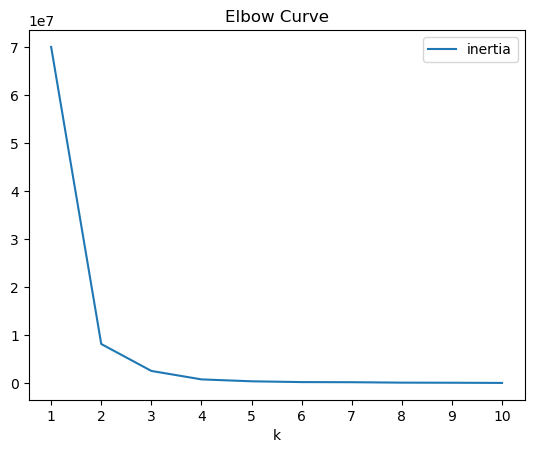

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x ='k',
                y = 'inertia',
                title = 'Elbow Curve',
                xticks = k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** the optimal value is 2 to 3 as that is where there is a sharp drop then leveling

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

In [9]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=1)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict_clusters = model.predict(df_market_scaled)

# View the resulting array of cluster values.
predict_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0])

In [11]:
# Create a copy of the DataFrame
predictions_df = market_data_df.copy()
predictions_df.head(20)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [12]:
# Add a new column to the DataFrame with the predicted clusters
predictions_df['predicted_clusters'] = predict_clusters

# Display sample data
predictions_df.head(20)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

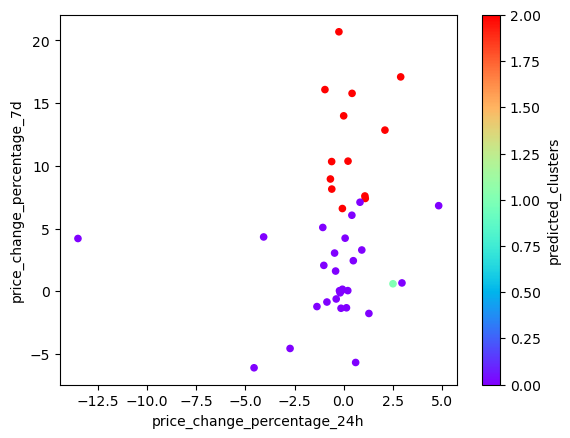

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
predictions_df.plot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = 'predicted_clusters',
    colormap = 'rainbow'
)

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca = pca.fit_transform(df_market_scaled)

# View the first five rows of the DataFrame. 
market_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Of the 3, IT IS 88%

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
df_market_pca = pd.DataFrame(
    market_pca,columns = ['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
df_market_pca['coin_id'] = df_market_pca.index

# Set the coinid column as index
df_market_pca = df_market_pca.set_index('coin_id')

# Display sample data
df_market_pca.head(20)

,PCA1,PCA2,PCA3
coin_id,,,
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715
5,-0.516534,1.388377,0.804071
6,-0.450711,0.517699,2.846143
7,-0.345600,0.729439,1.478013
8,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(df_market_pca)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_pca.head(20)

c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,38.584870
5,6,27.618972
6,7,23.793714
7,8,17.823822
8,9,14.123195
9,10,11.116837


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

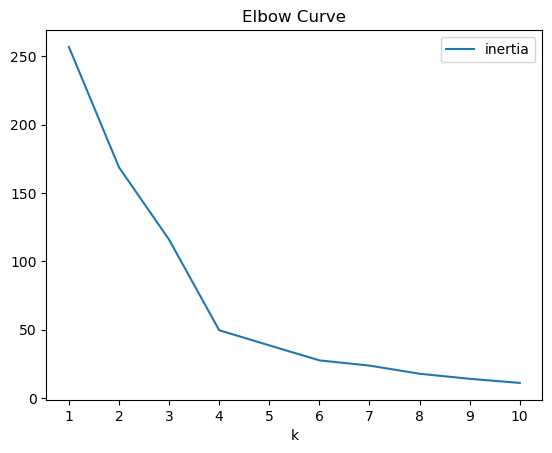

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot.line(x='k',
                    y='inertia',
                    title='Elbow Curve',
                    xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** it is 4 to 6


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** yes, original was 2 to 3 not 4 to 6

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

In [21]:
# Fit the K-Means model using the PCA data
model.fit(df_market_pca)

c:\Users\carol\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=1)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_cluster = model.predict(df_market_pca)

# Print the resulting array of cluster values.
crypto_cluster[:5]

array([2, 2, 0, 0, 2])

In [23]:
# Create a copy of the DataFrame with the PCA data
df_crypto_pca_predictions = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_crypto_pca_predictions['cypto clusters'] = crypto_cluster

# Display sample data
df_crypto_pca_predictions.head(20)

,PCA1,PCA2,PCA3,cypto clusters
coin_id,,,,
0,-0.600667,0.842760,0.461595,2
1,-0.458261,0.458466,0.952877,2
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,2
5,-0.516534,1.388377,0.804071,2
6,-0.450711,0.517699,2.846143,2
7,-0.345600,0.729439,1.478013,2
8,-0.649468,0.432165,0.600303,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

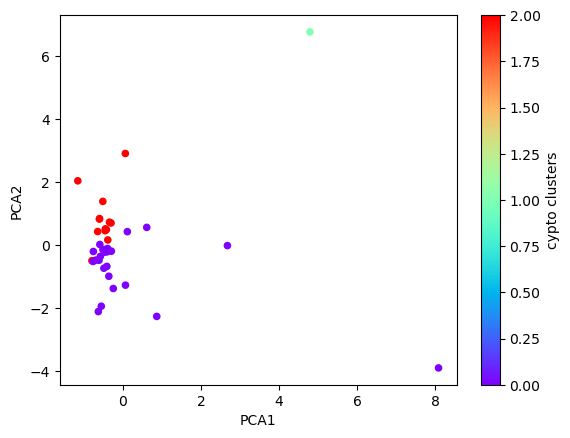

In [28]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
df_crypto_pca_predictions.plot.scatter(
    x = 'PCA1',
    y = 'PCA2',
    c = 'cypto clusters',
    colormap = 'rainbow')


    #predictions_df.plot.scatter(
    #x = 'price_change_percentage_24h',
    #y = 'price_change_percentage_7d',
    #c = 'predicted_clusters',
    #colormap = 'rainbow'

### Determine the Weights of Each Feature on each Principal Component

In [31]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weight = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_scaled.columns)
pca_component_weight


,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The strongest negative is PCA 1 at the 24 hour mark as it is -0.41, on the positive side, the PCA 3 at the 7 day mark has the highest change at 0.78